# Lab 4

## 1)a) Ajuste lineal por cuadrados mínimos

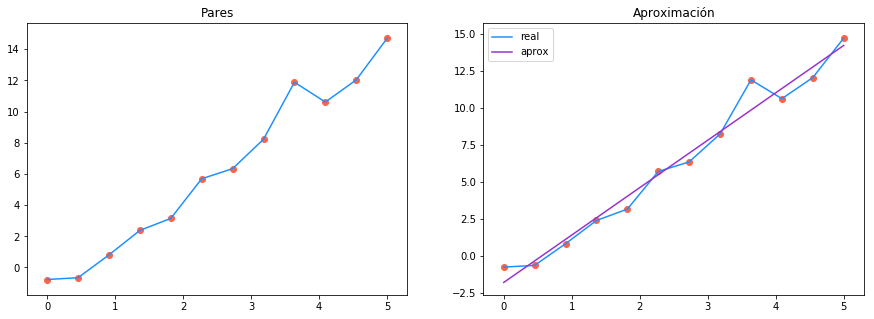

In [4]:
import glm  # fuck you numpy and your lineal algebra
import matplotlib.pyplot as plt
import numpy as np

rawList = np.loadtxt("Data/datos1a.dat")
xList , yList= rawList[0,:], rawList[1,:] 


def linealAjustment(listX,listY): # We shall do it with the matrix formula...
    assert listX.size == listY.size
    o0 = listX.size # sum(xi^0)
    o1 = np.sum(listX) # sum(xi^1)
    o2 = np.sum(listX**2) # sum(xi^2)
    o0y = sum(listY) #sum(xi^0 * yi)
    o1y = sum(listX*listY) #sum(xi^1 * yi)
    # B = A^(-1) * C
    A = glm.mat2(o0,o1,o1,o2) 
    C = glm.vec2(o0y,o1y)
    A = glm.inverse(A)
    B  = A * C
    return lambda k: B.x + B.y *k

adjust = linealAjustment(xList, yList)
Y_pred = adjust(xList)

f, ax = plt.subplots(1, 2, figsize=(15, 5))

# pares
ax[0].set_title('Pares')
ax[0].plot(xList, yList, color='dodgerblue')
ax[0].scatter(xList, yList, color='tomato')

# aprox
ax[1].set_title('Aproximación')
ax[1].plot(xList, yList, color='dodgerblue', label='real')
ax[1].scatter(xList, yList, color='tomato')
ax[1].plot(xList, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()

plt.show()

## 1)b)

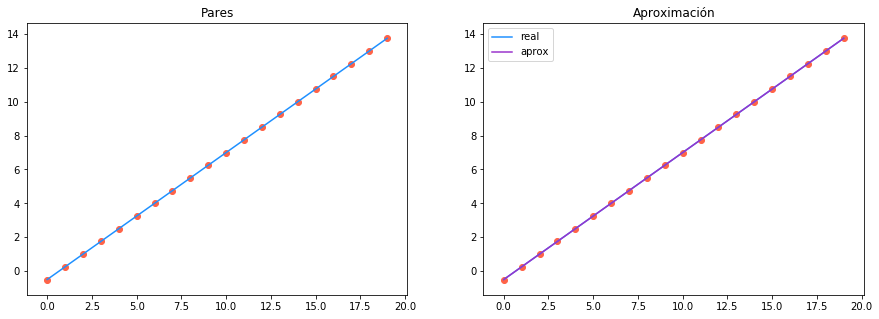

In [5]:
def unoA():
    xList = [float(i) for i in range(20)]
    yList = [((3/4)*i-0.5) for i in range(20)]
    
    adjust = linealAjustment(np.array(xList), np.array(yList))
    Y_pred = adjust(np.array(xList))
    
    f, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # pares
    ax[0].set_title('Pares')
    ax[0].plot(xList, yList, color='dodgerblue')
    ax[0].scatter(xList, yList, color='tomato')
    
    # aprox
    ax[1].set_title('Aproximación')
    ax[1].plot(xList, yList, color='dodgerblue', label='real')
    ax[1].scatter(xList, yList, color='tomato')
    ax[1].plot(xList, Y_pred, color='darkorchid', label='aprox')
    ax[1].legend()
     
    plt.show()
unoA()

## 2)a)

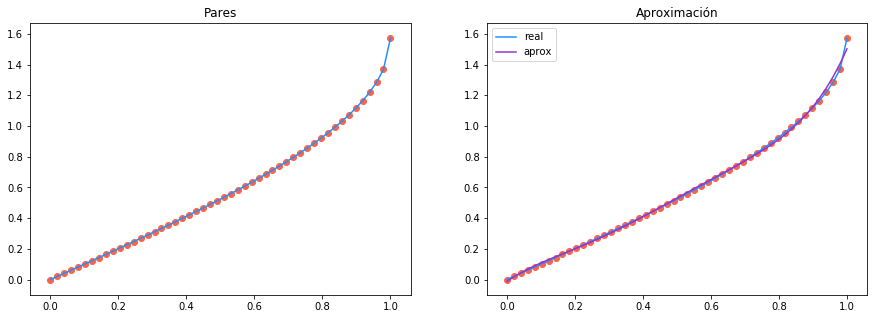

suma de residuos -> 0.45545018132867454


In [12]:
I = (0, 1)
deg = 5

X = np.linspace(*I, num=50)
Y = np.arcsin(X)

coefs = np.polyfit(X, Y, deg=deg)
poly = np.poly1d(coefs)
Y_pred = np.polyval(poly, X)

f, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Pares')
ax[0].plot(X, Y, color='dodgerblue')
ax[0].scatter(X, Y, color='tomato')

ax[1].set_title('Aproximación')
ax[1].plot(X, Y, color='dodgerblue', label='real')
ax[1].scatter(X, Y, color='tomato')
ax[1].plot(X, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()
plt.show()

res = np.abs(Y_pred - Y)
sum_res = np.sum(res)
print("suma de residuos ->" ,format(sum_res))

## 2)b)

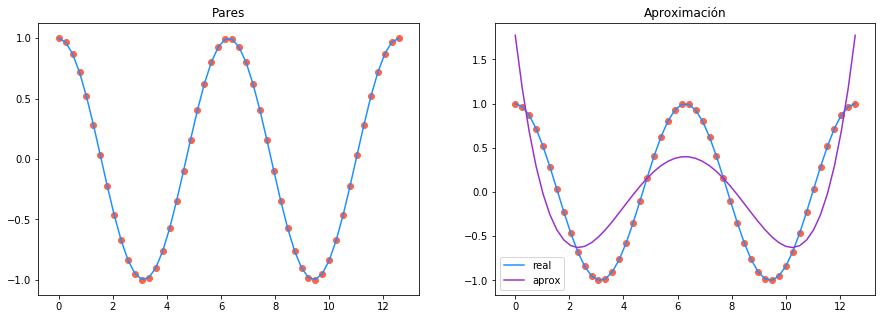

suma de residuos -> 18.791795635666396


In [13]:
I = (0, 4*np.pi)
deg = 5

X = np.linspace(*I, num=50)
Y = np.cos(X)

coefs = np.polyfit(X, Y, deg=deg)
poly = np.poly1d(coefs)
Y_pred = np.polyval(poly, X)

f, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Pares')
ax[0].plot(X, Y, color='dodgerblue')
ax[0].scatter(X, Y, color='tomato')

ax[1].set_title('Aproximación')
ax[1].plot(X, Y, color='dodgerblue', label='real')
ax[1].scatter(X, Y, color='tomato')
ax[1].plot(X, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()
plt.show()

res = np.abs(Y_pred - Y)
sum_res = np.sum(res)
print("suma de residuos ->" ,format(sum_res))

## 3)a)
y(x) = Cx^A --> ln(y(x)) = ln(C) + A*ln(x)

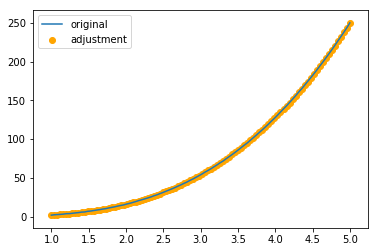

In [14]:
datos3a = np.loadtxt('Data/datos3a.dat')
datos3b = np.loadtxt('Data/datos3b.dat')

x, y = datos3a
x_ln = np.log(x)
y_ln = np.log(y)

p = np.polyfit(x_ln, y_ln, 1)

A, C = p
C = np.exp(C)
y_pred = C * pow(x, A)
plt.plot(x, y, label='original')
plt.scatter(x, y_pred, label='adjustment', color='orange')
plt.legend()

## 3)b)
y(x) = x / (A*x + B) --> 1/y(x) = (A*x + B) / x

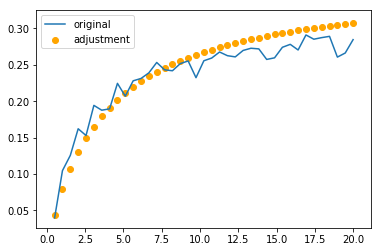

In [15]:
x, y = datos3b
# remove first value, it`s off.
x, y = x[1:], y[1:] 

y_inv = np.divide(1, y)
x_inv = np.divide(1, x)

p = np.polyfit(x_inv, y_inv, 1)

# coefs
B, A = p

# show results
y_pred = np.divide(x, A*x + B)

plt.plot(x, y, label='original')
plt.scatter(x, y_pred, label='adjustment', color='orange')
plt.legend()

## 4)
y(x) = a*e^(b*x)  -->  ln(y(x)) = a * b * x

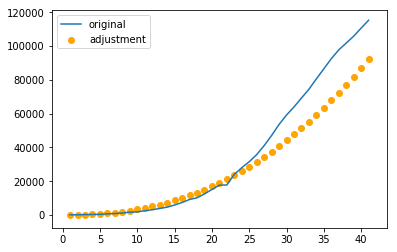

In [18]:
import pandas as pd
df = pd.read_csv('Data/covid_italia.csv', header=None)
x, y = np.array(df[0])[1:], np.array(df[1])[1:]
x_ln = np.log(x)
y_ln = np.log(y)

p = np.polyfit(x_ln, y_ln, 1)
A, C = p
C = np.exp(C)
y_pred = C * pow(x, A)
plt.plot(x, y, label='original')
plt.scatter(x, y_pred, label='adjustment', color='orange')
plt.legend()